<a href="https://colab.research.google.com/github/mkgreen/K-means-Clustering-Employee-Compensation/blob/main/k_means_project_stage2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries and Loading Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/employee-compensation.csv')
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


# **Exploratory Data Analysis (EDA)**

In [ ]:
df = data.copy()
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [ ]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 683277 rows and 22 columns.


In [ ]:
# checking for missing data
df.isnull().values.any()

True

In [ ]:
miss_val = df.isna().sum()

print("Missing Value Count by Feature:")
print("-"*31)
print(miss_val)

miss_val_count = miss_val.sum()

if miss_val_count == 0:
  print()
  print("There are no missing values in the dataset.")
else:
  print()
  print(f"There are {miss_val_count} missing values in this dataset.")

Missing Value Count by Feature:
-------------------------------
Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

There are 711 missing values in this dataset.


In [ ]:
# df.info()

In [ ]:
columns = df.columns.values
print("Features: ",columns)

Features:  ['Organization Group Code' 'Job Family Code' 'Job Code' 'Year Type' 'Year'
 'Organization Group' 'Department Code' 'Department' 'Union Code' 'Union'
 'Job Family' 'Job' 'Employee Identifier' 'Salaries' 'Overtime'
 'Other Salaries' 'Total Salary' 'Retirement' 'Health and Dental'
 'Other Benefits' 'Total Benefits' 'Total Compensation']


1. Year Type Fiscal (July through June) or Calendar (January through December)

Column: 'Year Type' dtype: object

Value Counts:
---------------
Fiscal      385113
Calendar    298164
Name: Year Type, dtype: int64



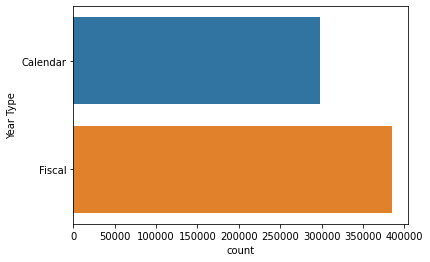

In [ ]:
print("Column: 'Year Type' dtype:",df['Year Type'].dtype)
print()

print("Value Counts:")
print("-"*15)
print(df['Year Type'].value_counts())
print()

sns.countplot(y='Year Type', data=df)
plt.show()

2. Year An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.

Column: 'Year' dtype: int64

2017    129993
2019     89053
2016     88478
2015     86067
2018     85639
2014     82291
2013     79380
2020     42376
Name: Year, dtype: int64



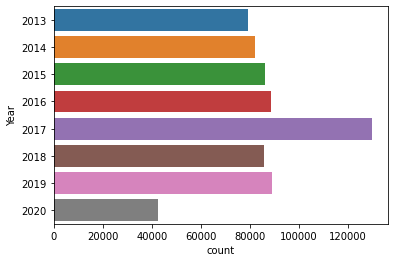

In [ ]:
print("Column: 'Year' dtype:",df['Year'].dtype)
print()
print(df['Year'].value_counts())
print()
sns.countplot(y='Year', data=df)
plt.show()

3. Organization Group Code Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff.

Column: 'Organization Group Code' dtype: int64

Value Counts:
---------------
2    215770
4    150122
1    130982
6     62123
5     62118
3     61678
7       484
Name: Organization Group Code, dtype: int64



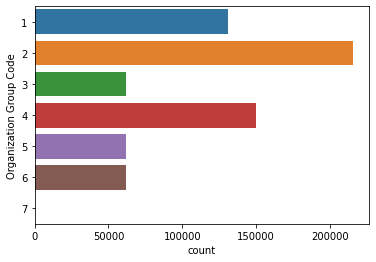

In [ ]:
print("Column: 'Organization Group Code' dtype:",df['Organization Group Code'].dtype)
print()

print("Value Counts:")
print("-"*15)
print(df['Organization Group Code'].value_counts())
print()

sns.countplot(y='Organization Group Code', data=df)
plt.show()

4. Organization Group Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff.

Column: 'Organization Group' dtype: object

Value Counts:
---------------
Public Works, Transportation & Commerce     215770
Community Health                            150122
Public Protection                           130982
General Administration & Finance             62123
Culture & Recreation                         62118
Human Welfare & Neighborhood Development     61678
General City Responsibilities                  484
Name: Organization Group, dtype: int64



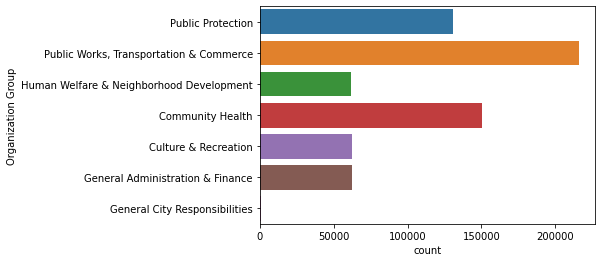

In [ ]:
print("Column: 'Organization Group' dtype:",df['Organization Group'].dtype)
print()

print("Value Counts:")
print("-"*15)
print(df['Organization Group'].value_counts())
print()

sns.countplot(y='Organization Group', data=df)
plt.show()

5. Department Code Departments are the primary organizational unit used by the City and County of San Francisco. Examples include

Column: 'Department Code' dtype: object

Value Counts:
---------------
DPH    150122
MTA    101886
POL     53140
REC     38745
DSS     34606
AIR     31808
FIR     29539
DPW     26679
PUC     26431
HSA     19559
SHF     17781
ADM     17440
LIB     15608
CRT      8943
WTR      7623
CWP      5399
CAT      5373
DAT      5249
DBI      5111
REG      5072
CON      5033
JUV      5025
TIS      4927
HRD      4852
PRT      4771
CPC      4526
TTX      3954
FAM      3865
HHP      3808
PDR      3142
ASR      3110
ECD      3015
ADP      2848
MYR      2309
ENV      2108
ECN      2042
DEM      2013
BOS      1980
RET      1829
WAR      1605
CSS      1441
AAM      1298
HSS      1193
HOM      1154
CHF      1068
RNT       747
ART       742
UNA       482
HRC       453
ETH       343
DPA       287
CFC       271
WOM       245
SCI       221
CSC       182
PAB       116
BOA        66
LLB        34
CLP        30
CII        26
Name: Department Code, dtype: int64



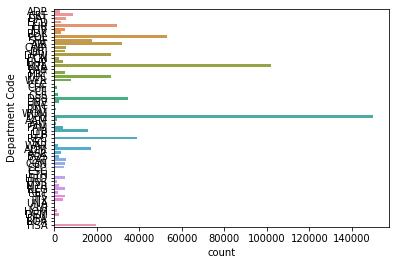

In [ ]:
print("Column: 'Department Code' dtype:",df['Department Code'].dtype)
print()

print("Value Counts:")
print("-"*15)
print(df['Department Code'].value_counts())
print()

sns.countplot(y='Department Code',data=df)
plt.show()

6. Code Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).

Column: 'Union Code' dtype: float64

Value Counts:
---------------
790.0    193995
21.0      88661
791.0     52731
253.0     43373
911.0     42544
          ...  
220.0        34
969.0        22
302.0        17
357.0        15
604.0        12
Name: Union Code, Length: 70, dtype: int64



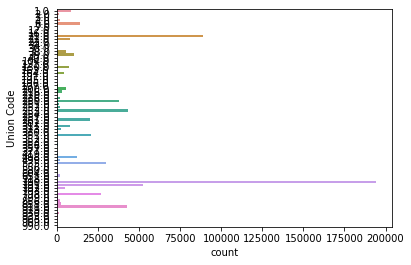

In [ ]:
print("Column: 'Union Code' dtype:",df['Union Code'].dtype)
print()

print("Value Counts:")
print("-"*15)
print(df['Union Code'].value_counts())
print()

sns.countplot(y='Union Code',data=df)
plt.show()

7. Union Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).

Column: 'Union' dtype: object

Value Counts:
---------------
SEIU, Local 1021, Misc                             115502
SEIU - Miscellaneous, Local 1021                   108284
Prof & Tech Engineers - Miscellaneous, Local 21     48814
Prof & Tech Eng, Local 21                           43424
SEIU - Staff and Per Diem Nurses, Local 1021        28721
                                                    ...  
Port Director                                          12
Management Unrepresented Employees - MTA                9
Indv. Employment Contract-MTA                           8
SFIPOA, Op Eng, Local 3                                 7
TWU Local 200                                           7
Name: Union, Length: 129, dtype: int64



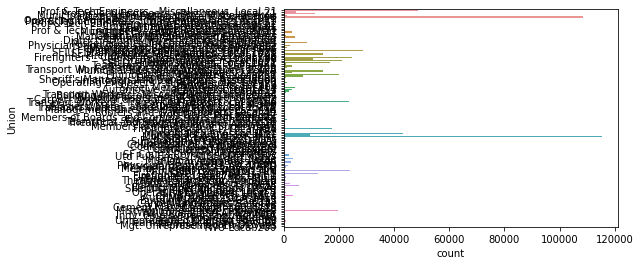

In [ ]:
print("Column: 'Union' dtype:",df['Union'].dtype)
print()

print("Value Counts:")
print("-"*15)
print(df['Union'].value_counts())
print()

sns.countplot(y='Union',data=df)
plt.show()

8. Job Family Code Job Family combines similar Jobs into meaningful groups.



Column: 'Job Family Code' dtype: object

Value Counts:
---------------
2300              71080
9100              57142
Q000              42326
7300              39921
2900              35101
9900              31968
1400              29628
H000              28048
2700              22202
0900              21101
3200              20359
1800              20283
8200              20060
5200              19828
8300              18161
1000              16777
8100              15243
2500              14145
1600              13651
3600              12449
2400              11730
1200              10059
5300               9008
7500               8972
3400               7388
9200               6622
7200               6617
0000               6005
7400               5825
SCRT               5323
2200               5156
9700               5044
2600               4942
1900               3801
6300               3766
8400               3169
4200               3063
1300               2956
5600             

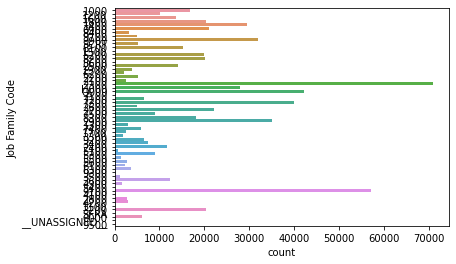

In [ ]:
print("Column: 'Job Family Code' dtype:",df['Job Family Code'].dtype)
print()

print("Value Counts:")
print("-"*15)
print(df['Job Family Code'].value_counts())
print()

sns.countplot(y='Job Family Code',data=df)
plt.show()


9. Job Family Job Family combines similar Jobs into meaningful groups.



Column: 'Job Family' dtype: object

Value Counts:
---------------
Nursing                           71080
Street Transit                    57142
Police Services                   42326
Journeyman Trade                  39921
Human Services                    35101
Public Service Aide               31968
Clerical, Secretarial & Steno     29628
Fire Services                     28048
Housekeeping & Laundry            22202
Management                        21101
Recreation                        20359
Budget, Admn & Stats Analysis     20283
Protection & Apprehension         20060
Professional Engineering          19828
Correction & Detention            18161
Information Systems               16777
Legal & Court                     15243
Med Therapy & Auxiliary           14145
Payroll, Billing & Accounting     13651
Library                           12449
Lab, Pharmacy & Med Techs         11730
Personnel                         10059
Sub-Professional Engineering       9008
Semi-Skilled &

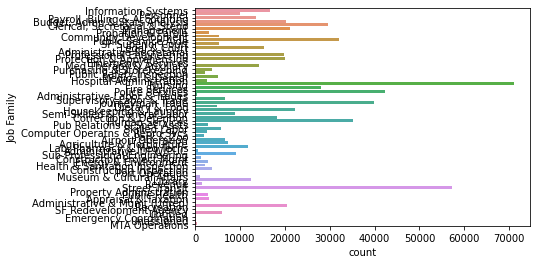

In [ ]:
print("Column: 'Job Family' dtype:",df['Job Family'].dtype)
print()

print("Value Counts:")
print("-"*15)
print(df['Job Family'].value_counts())
print()

sns.countplot(y='Job Family',data=df)
plt.show()


10. Job Code Jobs are defined by the Human Resources classification unit. Examples include gardeners, police officers, and accountants.



Column: 'Job Code' dtype: object

Value Counts:
---------------
9163    43373
P103    25285
2320    21954
H002    14038
9910    13690
        ...  
8213        1
444C        1
432C        1
4233        1
0881        1
Name: Job Code, Length: 1210, dtype: int64



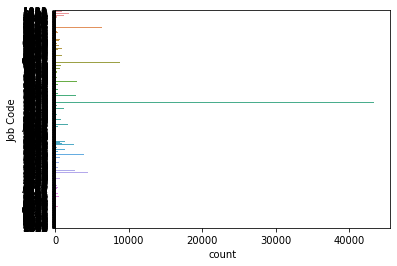

In [ ]:
print("Column: 'Job Code' dtype:",df['Job Code'].dtype)
print()

print("Value Counts:")
print("-"*15)
print(df['Job Code'].value_counts())
print()

sns.countplot(y='Job Code',data=df)
plt.show()


11. Job Jobs are defined by the Human Resources classification unit. Examples include gardeners, police officers, and accountants.



Column: 'Job' dtype: object

Value Counts:
---------------
Transit Operator                  43373
Special Nurse                     25285
Registered Nurse                  21954
Firefighter                       14038
Public Service Trainee            13690
                                  ...  
Court Adr Coord                       1
Trial Delay Reduct Coord              1
Court Supervisor I                    1
Veterans Claims Rep Supervisor        1
Mayoral Staff I                       1
Name: Job, Length: 1349, dtype: int64



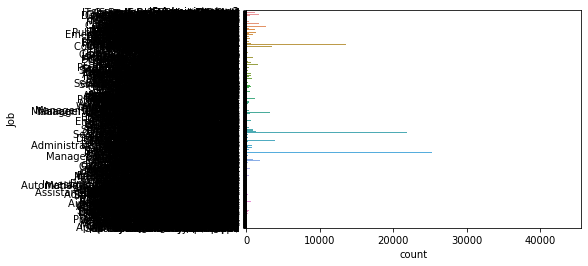

In [ ]:
print("Column: 'Job' dtype:",df['Job'].dtype)
print()

print("Value Counts:")
print("-"*15)
print(df['Job'].value_counts())
print()

sns.countplot(y='Job',data=df)
plt.show()


12. Employee Identifier Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the Employee Compensation report hosted on openbook.sfgov.org, but that report does show one row for each employee. Employee ID has been included here to allow users to reconstruct the original report. Note that each employee’s identifier will change each time this dataset is updated, so comparisons by employee across multiple versions of the dataset are not possible.

In [ ]:
print("Column: 'Employee Identifier' dtype:",df['Employee Identifier'].dtype)
print()

print("Value Counts:")
print("-"*15)
print(df['Employee Identifier'].value_counts())
print()

sns.countplot(y='Employee Identifier',data=df)
plt.show()


Column: 'Employee Identifier' dtype: int64

Value Counts:
---------------
0           40
43227       23
7041        22
52786       22
30585       22
            ..
40802349     1
40802371     1
40803410     1
41096550     1
42439576     1
Name: Employee Identifier, Length: 309750, dtype: int64



KeyboardInterrupt: ignored

13. Salaries Normal salaries paid to permanent or temporary City employees.



In [ ]:
print("Column: 'Salaries' dtype:",df['Salaries'].dtype)
print()

print("Value Counts:")
print("-"*15)
print(df['Salaries'].value_counts())
print()

sns.countplot(y='Salaries',data=df)
plt.show()

Column: 'Salaries' dtype: float64

Value Counts:
---------------
0.00        11680
61603.00      389
56531.00      388
60706.00      346
54703.00      338
            ...  
57253.70        1
54569.00        1
57225.02        1
52752.66        1
2488.00         1
Name: Salaries, Length: 498512, dtype: int64

